In [1]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt
import math
import sympy as sym
from sympy import symbols, Function, Eq, solve, Matrix
get_ipython().run_line_magic('matplotlib', 'inline')


In [2]:
### Initialize model
m = GEKKO()
nt = 101
m.time = np.linspace(0,1,nt)
up_b = 1.0 # upper bound
mus = np.random.rand(6)

In [3]:
### Parameters
c1 = m.Const(value = 1.0)
c2 = m.Const(value = 1.0)
c3 = m.Const(value = 1.0)

# final conditions for q
# b = [1, 0, 0, 1, 
    #  0, 1, 0, 0, 
    #  0, 0, 1, 0, 
    #  0, 0, 0, 1] # final point (opposite end) configuration of rod
b11 = m.Const(value = 1.0)
b12 = m.Const(value = 0.0)
b13 = m.Const(value = 0.0)
b14 = m.Const(value = 0.5)
b21 = m.Const(value = 0.0)
b22 = m.Const(value = 1.0)
b23 = m.Const(value = 0.0)
b24 = m.Const(value = 1.0)
b31 = m.Const(value = 0.0)
b32 = m.Const(value = 0.0)
b33 = m.Const(value = 1.0)
b34 = m.Const(value = 0.0)
b41 = m.Const(value = 0.0)
b42 = m.Const(value = 0.0)
b43 = m.Const(value = 0.0)
b44 = m.Const(value = 1.0)


p = np.zeros(nt) # final time point
p[-1] = 1.0
final = m.Param(value=p)

# qminimize = m.Var(value = 0)


In [4]:
### Variables
# need to figure out what's the initial values for mus
# mu1 = m.Var(value = 0.1, lb = 0, ub = 1)
# mu2 = m.Var(value = 0.1, lb = 0, ub = 1)
# mu3 = m.Var(value = 0.1, lb = 0, ub = 1)
# mu4 = m.Var(value = 0.1, lb = 0, ub = 1)
# mu5 = m.Var(value = 0.1, lb = 0, ub = 1)
# mu6 = m.Var(value = 0.1, lb = 0, ub = 1)
# mu1 = m.Var(value = 0.0)
# mu2 = m.Var(value = 0.0)
# mu3 = m.Var(value = 0.0)
# mu4 = m.Var(value = 0.0)
# mu5 = m.Var(value = 0.0)
# mu6 = m.Var(value = 0.0)
# mu1 = m.Var(fixed_initial = False)
# mu2 = m.Var(fixed_initial = False)
# mu3 = m.Var(fixed_initial = False)
# mu4 = m.Var(fixed_initial = False)
# mu5 = m.Var(fixed_initial = False)
# mu6 = m.Var(fixed_initial = False)
mu1 = m.Var(value = mus[0])
mu2 = m.Var(value = mus[1])
mu3 = m.Var(value = mus[2])
mu4 = m.Var(value = mus[3])
mu5 = m.Var(value = mus[4])
mu6 = m.Var(value = mus[5])

u1 = m.Var(fixed_initial=False)
u2 = m.Var(fixed_initial=False)
u3 = m.Var(fixed_initial=False)
# u1 = m.Var(value = 500)
# u2 = m.Var(value = 500)
# u3 = m.Var(value = 500)

# e = [1,0,0,0, 
     # 0,1,0,0, 
     # 0,0,1,0, 
     # 0,0,0,1] # beginning point of rod - no rotation or translation

# q11 = m.Var(value = 1.0, ub = up_b)
# q12 = m.Var(value = 0.0, ub = up_b)
# q13 = m.Var(value = 0.0, ub = up_b)
# q14 = m.Var(value = 0.0, ub = up_b)
# q21 = m.Var(value = 0.0, ub = up_b)
# q22 = m.Var(value = 1.0, ub = up_b)
# q23 = m.Var(value = 0.0, ub = up_b)
# q24 = m.Var(value = 0.0, ub = up_b)
# q31 = m.Var(value = 0.0, ub = up_b)
# q32 = m.Var(value = 0.0, ub = up_b)
# q33 = m.Var(value = 1.0, ub = up_b)
# q34 = m.Var(value = 0.0, ub = up_b)
# q41 = m.Var(value = 0.0, ub = up_b)
# q42 = m.Var(value = 0.0, ub = up_b)
# q43 = m.Var(value = 0.0, ub = up_b)
# q44 = m.Var(value = 1.0, ub = up_b)

q11 = m.Var(value = 1.0)
q12 = m.Var(value = 0.0)
q13 = m.Var(value = 0.0)
q14 = m.Var(value = 0.0)
q21 = m.Var(value = 0.0)
q22 = m.Var(value = 1.0)
q23 = m.Var(value = 0.0)
q24 = m.Var(value = 0.0)
q31 = m.Var(value = 0.0)
q32 = m.Var(value = 0.0)
q33 = m.Var(value = 1.0)
q34 = m.Var(value = 0.0)
q41 = m.Var(value = 0.0)
q42 = m.Var(value = 0.0)
q43 = m.Var(value = 0.0)
q44 = m.Var(value = 1.0)

# m.fix_final(q11, val=b11)
# m.fix_final(q12, val=b12)
# m.fix_final(q13, val=b13)
# m.fix_final(q14, b14)

# m.fix_final(q21, val=b21)
# m.fix_final(q22, val=b22)
# m.fix_final(q23, val=b23)
# m.fix_final(q24, b24)

# m.fix_final(q31, val=b31)
# m.fix_final(q32, val=b32)
# m.fix_final(q33, val=b33)
# m.fix_final(q34, val=b34)

# m.fix_final(q41, val=b41)
# m.fix_final(q42, val=b42)
# m.fix_final(q43, val=b43)
# m.fix_final(q44, val=b44)

# m.fix(q11, pos = 1, val=b11)
# m.fix(q12, pos = 1,val=b12)
# m.fix(q13, pos = 1,val=b13)
# m.fix(q14, pos = 1,val = b14)

# m.fix(q21, pos = 1,val=b21)
# m.fix(q22, pos = 1,val=b22)
# m.fix(q23, pos = 1,val=b23)
# m.fix(q24, pos = 1,val = b24)

# m.fix(q31, pos = 1,val=b31)
# m.fix(q32, pos = 1,val=b32)
# m.fix(q33, pos = 1,val=b33)
# m.fix(q34, pos = 1,val=b34)

# m.fix(q41, pos = 1,val=b41)
# m.fix(q42, pos = 1,val=b42)
# m.fix(q43, pos = 1,val=b43)
# m.fix(q44, pos = 1,val=b44)

# q11 = m.Var(value = 1.0, lb = 0, ub = up_b, fixed_final = True)
# q12 = m.Var(value = 0.0, lb = 0, ub = up_b, fixed_final = True)
# q13 = m.Var(value = 0.0, lb = 0, ub = up_b, fixed_final = True)
# q14 = m.Var(value = 0.0, lb = 0, ub = up_b, fixed_final = True)
# q21 = m.Var(value = 0.0, lb = 0, ub = up_b, fixed_final = True)
# q22 = m.Var(value = 1.0, lb = 0, ub = up_b, fixed_final = True)
# q23 = m.Var(value = 0.0, lb = 0, ub = up_b, fixed_final = True)
# q24 = m.Var(value = 0.0, lb = 0, ub = up_b, fixed_final = True)
# q31 = m.Var(value = 0.0, lb = 0, ub = up_b, fixed_final = True)
# q32 = m.Var(value = 0.0, lb = 0, ub = up_b, fixed_final = True)
# q33 = m.Var(value = 1.0, lb = 0, ub = up_b, fixed_final = True)
# q34 = m.Var(value = 0.0, lb = 0, ub = up_b, fixed_final = True)
# q41 = m.Var(value = 0.0, lb = 0, ub = up_b, fixed_final = True)
# q42 = m.Var(value = 0.0, lb = 0, ub = up_b, fixed_final = True)
# q43 = m.Var(value = 0.0, lb = 0, ub = up_b, fixed_final = True)
# q44 = m.Var(value = 1.0, lb = 0, ub = up_b, fixed_final = True)




# qminimize = m.Var(value = 0)

In [5]:
### Equations
m.Equation(u1 == c1**(-1)*mu1)
m.Equation(u2 == c2**(-1)*mu2)
m.Equation(u3 == c3**(-1)*mu3)

m.Equation(mu1.dt() == u3*mu2 - u2*mu3)
m.Equation(mu2.dt() == mu6 +u1*mu3 - u3*mu1)
m.Equation(mu3.dt() == -mu5 + u2*mu1 - u1*mu2)
m.Equation(mu4.dt() == u3*mu5 - u2*mu6)
m.Equation(mu5.dt() == u1*mu6 - u3*mu4)
m.Equation(mu6.dt() == u2*mu4 - u1*mu5)

m.Equation(q11.dt() == u3*q12 - u2*q13)
m.Equation(q12.dt() == -u3*q11 + u1*q13)
m.Equation(q13.dt() == u2*q11 - u1*q12)
m.Equation(q14.dt() == q11)

m.Equation(q21.dt() == u3*q22 - u2*q23)
m.Equation(q22.dt() == -u3*q21 + u1*q23)
m.Equation(q23.dt() == u2*q21 - u1*q22)
m.Equation(q24.dt() == q21)

m.Equation(q31.dt() == u3*q32 - u2*q33)
m.Equation(q32.dt() == -u3*q31 + u1*q33)
m.Equation(q33.dt() == u2*q31 - u1*q31)
m.Equation(q34.dt() == q31)

m.Equation(q41.dt() == u3*q42 - u2*q43)
m.Equation(q42.dt() == -u3*q41 + u1*q43)
m.Equation(q43.dt() == u2*q41 - u1*q42)
m.Equation(q44.dt() == q41)

# m.Equation(qminimize.dt()== 0.5*(c1*u1**2 + c2*u2**2 + c3*u3**2))


# m.fix_final(q11, val=b11)
# m.fix_final(q12, val=b12)
# m.fix_final(q13, val=b13)
# m.fix_final(q14, b14)

# m.fix_final(q21, val=b21)
# m.fix_final(q22, val=b22)
# m.fix_final(q23, val=b23)
# m.fix_final(q24, b24)

# m.fix_final(q31, val=b31)
# m.fix_final(q32, val=b32)
# m.fix_final(q33, val=b33)
# m.fix_final(q34, val=b34)

# m.fix_final(q41, val=b41)
# m.fix_final(q42, val=b42)
# m.fix_final(q43, val=b43)
# m.fix_final(q44, val=b44)


# m.fix_initial(q11, val=1)
# m.fix_initial(q12, val=0)
# m.fix_initial(q13, val=0)
# m.fix_initial(q14, val=0)

# m.fix_initial(q21, val=0)
# m.fix_initial(q22, val=1)
# m.fix_initial(q23, val=0)
# m.fix_initial(q24, val=0)

# m.fix_initial(q31, val=0)
# m.fix_initial(q32, val=0)
# m.fix_initial(q33, val=1)
# m.fix_initial(q34, val=0)

# m.fix_initial(q41, val=0)
# m.fix_initial(q42, val=0)
# m.fix_initial(q43, val=0)
# m.fix_initial(q44, val=1)

# m.Equation(qminimize.dt() == 0.5*(c1*u1**2 + c2*u2**2 + c3*u3**2))

In [6]:
### Objective
# m.Obj(qminimize*final)
m.Obj(0.5*m.integral(c1*u1**2 + c2*u2**2 + c3*u3**2))

### Solve
m.options.IMODE = 6       # 6 = simultaneous (CTL)
m.solve(disp=False)
# m.solve()


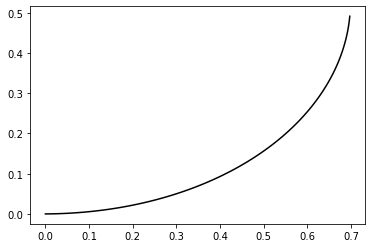

In [7]:
plt.plot(q14.value,q24.value,'k-',label=r'$q_1$')

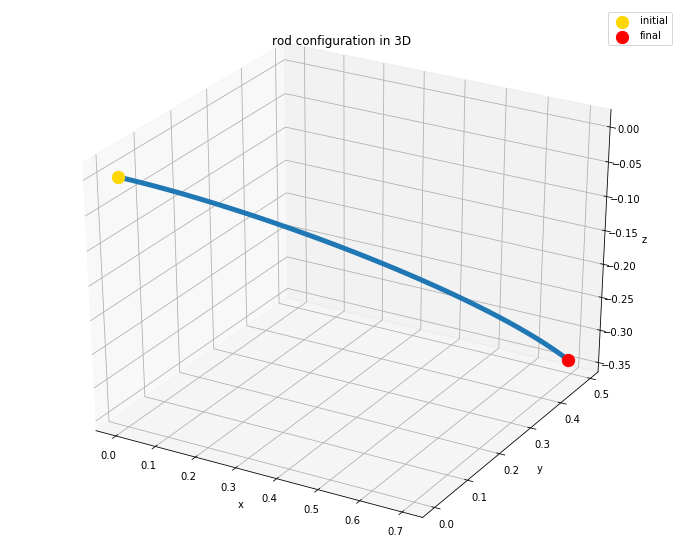

In [8]:
from mpl_toolkits import mplot3d
### Interpret final q's
x = [q14[i] for i in range(nt)]
y = [q24[i] for i in range(nt)]
z = [q34[i] for i in range(nt)]

# 3D plot
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection ='3d')
ax.scatter(x[0], y[0], z[0], marker='o', s=150, color='gold', label='initial')
ax.scatter(x[-1], y[-1], z[-1], marker='o', s=150, color='red', label='final')
ax.set_title('rod configuration in 3D')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()
# ax.set_xlim([0,1])
# ax.set_ylim([0,1])
# ax.set_zlim([0,1])
ax.plot3D(x, y, z, linewidth=5)

In [9]:
print(x[-1])
print(y[-1])
print(mus)

0.69724775842
0.49117165431
[0.55834482 0.7018081  0.99249432 0.83718592 0.08429664 0.58502537]
